In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

file_path = 'C:/Users/a/Desktop/프로젝트/model3.csv'
data3 = pd.read_csv(file_path)

data3.head()

,"last_name, first_name",player_id,year,pa,slg_percent,isolated_power,babip,xiso,exit_velocity_avg,launch_angle_avg,...,avg_hyper_speed,meatball_swing_percent,whiff_percent,swing_percent,pull_percent,straightaway_percent,opposite_percent,groundballs_percent,flyballs_percent,linedrives_percent
0,"Cabrera, Miguel",408234,2021,526,0.386,0.130,0.305,0.186,91.4,10.0,...,95.613068,77.4,25.8,49.4,32.8,37.2,30.0,49.0,25.9,21.5
1,"Molina, Yadier",425877,2021,473,0.370,0.118,0.283,0.151,88.0,15.3,...,92.936144,78.3,24.0,57.1,43.4,34.3,22.3,42.6,29.1,21.7
2,"Cruz Jr., Nelson",443558,2021,584,0.497,0.232,0.286,0.248,92.9,11.8,...,97.364589,89.3,30.7,51.0,36.6,36.4,27.0,43.4,25.5,22.0
3,"Peralta, David",444482,2021,538,0.402,0.143,0.303,0.103,89.3,5.3,...,94.748490,77.6,21.3,46.5,31.2,40.8,28.0,54.9,15.6,23.2
4,"Escobar, Alcides",444876,2021,349,0.404,0.116,0.337,0.091,81.7,11.1,...,91.096948,75.0,21.6,52.1,31.1,38.2,30.7,45.3,20.6,28.8


In [2]:
# No missing data
missing_data = data3.isnull().sum()
missing_data

last_name, first_name     0
player_id                 0
year                      0
pa                        0
slg_percent               0
isolated_power            0
babip                     0
xiso                      0
exit_velocity_avg         0
launch_angle_avg          0
sweet_spot_percent        0
barrel_batted_rate        0
hard_hit_percent          0
avg_best_speed            0
avg_hyper_speed           0
meatball_swing_percent    0
whiff_percent             0
swing_percent             0
pull_percent              0
straightaway_percent      0
opposite_percent          0
groundballs_percent       0
flyballs_percent          0
linedrives_percent        0
dtype: int64

In [3]:
# 모델1의 예측변수 SLG에 대한 선수, 연도 데이터를 따로 생성
player_data = data3[['last_name, first_name','year','slg_percent']]
player_data.head()

,"last_name, first_name",year,slg_percent
0,"Cabrera, Miguel",2021,0.386
1,"Molina, Yadier",2021,0.370
2,"Cruz Jr., Nelson",2021,0.497
3,"Peralta, David",2021,0.402
4,"Escobar, Alcides",2021,0.404


In [4]:
columns_of_interest = ['slg_percent','babip','launch_angle_avg','sweet_spot_percent',
     'hard_hit_percent','meatball_swing_percent','whiff_percent','swing_percent',
    'pull_percent','straightaway_percent','opposite_percent','groundballs_percent','flyballs_percent','linedrives_percent']

selected_data = data3[columns_of_interest]

selected_data.head()

,slg_percent,babip,launch_angle_avg,sweet_spot_percent,hard_hit_percent,meatball_swing_percent,whiff_percent,swing_percent,pull_percent,straightaway_percent,opposite_percent,groundballs_percent,flyballs_percent,linedrives_percent
0,0.386,0.305,10.0,32.8,49.0,77.4,25.8,49.4,32.8,37.2,30.0,49.0,25.9,21.5
1,0.370,0.283,15.3,34.1,31.6,78.3,24.0,57.1,43.4,34.3,22.3,42.6,29.1,21.7
2,0.497,0.286,11.8,31.8,52.5,89.3,30.7,51.0,36.6,36.4,27.0,43.4,25.5,22.0
3,0.402,0.303,5.3,27.2,41.8,77.6,21.3,46.5,31.2,40.8,28.0,54.9,15.6,23.2
4,0.404,0.337,11.1,36.3,21.0,75.0,21.6,52.1,31.1,38.2,30.7,45.3,20.6,28.8


In [5]:
correlation_matrix = selected_data.corr()

slg_correlations = correlation_matrix['slg_percent'].sort_values(ascending=False)
slg_correlations

slg_percent               1.000000
hard_hit_percent          0.610226
flyballs_percent          0.380406
babip                     0.360458
sweet_spot_percent        0.312292
launch_angle_avg          0.238547
pull_percent              0.227544
meatball_swing_percent    0.182113
whiff_percent             0.167619
linedrives_percent        0.072323
swing_percent             0.000028
straightaway_percent     -0.153713
opposite_percent         -0.188257
groundballs_percent      -0.333395
Name: slg_percent, dtype: float64

In [6]:
for column in selected_data.columns:
    lower_bound = np.percentile(selected_data[column], 1)
    upper_bound = np.percentile(selected_data[column], 99)
    selected_data[column] = np.clip(selected_data[column], lower_bound, upper_bound)

selected_data.describe()

C:\Users\a\AppData\Local\Temp\ipykernel_29776\2140555326.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data[column] = np.clip(selected_data[column], lower_bound, upper_bound)
C:\Users\a\AppData\Local\Temp\ipykernel_29776\2140555326.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data[column] = np.clip(selected_data[column], lower_bound, upper_bound)
C:\Users\a\AppData\Local\Temp\ipykernel_29776\2140555326.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

,slg_percent,babip,launch_angle_avg,sweet_spot_percent,hard_hit_percent,meatball_swing_percent,whiff_percent,swing_percent,pull_percent,straightaway_percent,opposite_percent,groundballs_percent,flyballs_percent,linedrives_percent
count,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000
mean,0.417828,0.296299,13.031216,33.985249,39.963599,77.454837,24.893206,47.889177,38.336408,36.782472,24.879063,42.826916,26.344809,23.920583
std,0.065120,0.033882,4.521335,3.593069,7.224418,6.597897,5.924829,4.694694,5.834419,3.651736,4.038671,6.477217,5.335372,2.858725
min,0.280020,0.215170,2.800000,25.734000,21.634000,61.685000,11.834000,37.617000,25.185000,28.017000,15.917000,29.017000,15.417000,16.951000
25%,0.373000,0.274000,10.000000,31.500000,35.400000,73.000000,20.700000,44.600000,34.225000,34.200000,22.200000,38.300000,22.500000,21.825000
50%,0.412500,0.297000,13.150000,34.000000,40.150000,77.500000,24.700000,47.800000,38.300000,36.700000,24.800000,42.700000,26.000000,23.900000
75%,0.459000,0.320000,16.100000,36.375000,44.900000,82.100000,29.000000,51.000000,42.300000,39.300000,27.500000,47.175000,30.100000,25.900000
max,0.600320,0.371830,22.600000,42.900000,55.883000,92.349000,38.883000,59.483000,52.232000,45.400000,35.449000,57.349000,39.866000,30.900000


In [7]:
highly_correlated_pairs = correlation_matrix[(correlation_matrix > 0.8) & (correlation_matrix != 1)].stack()
highly_correlated_pairs

launch_angle_avg  flyballs_percent    0.842492
flyballs_percent  launch_angle_avg    0.842492
dtype: float64

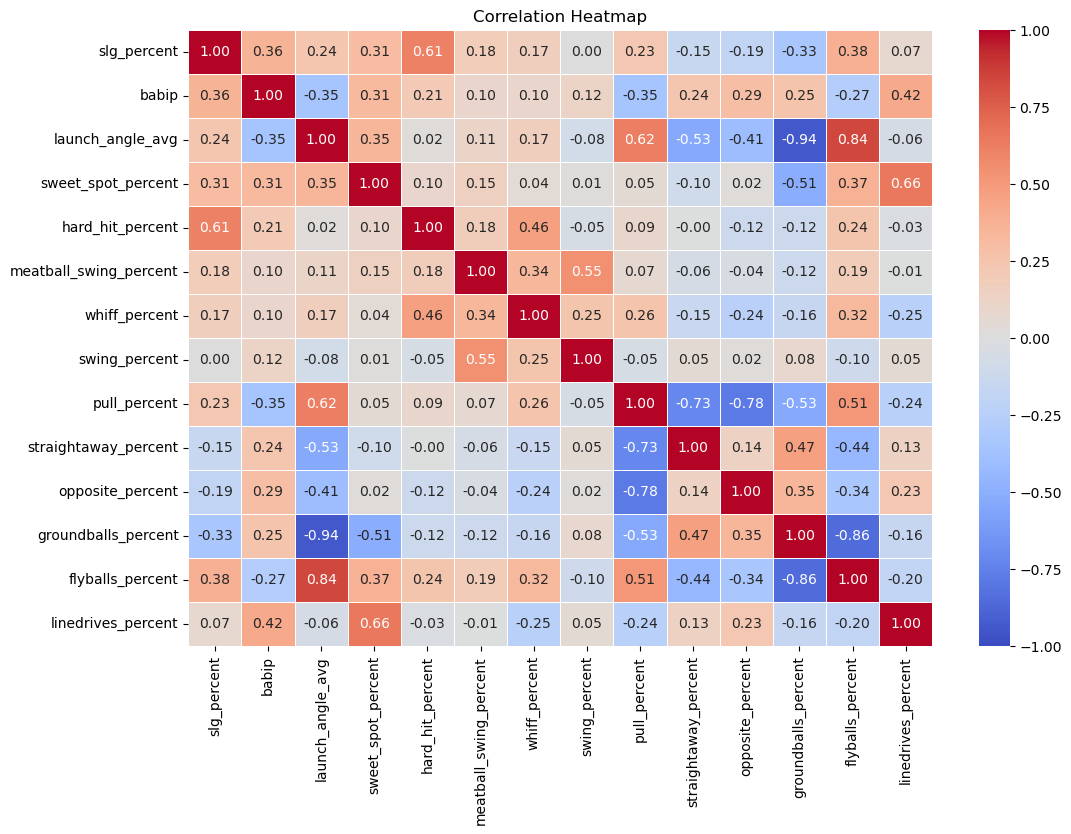

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

In [9]:
# Initialize scalers
standard_scaler = StandardScaler()

# Apply StandardScaler to proportion-based features
standard_scaler.fit_transform(selected_data)

array([[-0.48898665,  0.25692724, -0.67072511, ...,  0.9534723 ,
        -0.08340705, -0.84711413],
       [-0.73479863, -0.39268032,  0.50201961, ..., -0.03504861,
         0.51663211, -0.77712157],
       [ 1.21633396, -0.30409747, -0.27243445, ...,  0.0885165 ,
        -0.15841195, -0.67213272],
       ...,
       [-1.33396533,  0.7293691 , -1.99836064, ...,  2.11189524,
        -2.04909785, -0.28717361],
       [ 1.26242371,  0.64078625,  0.34712879, ..., -0.93089569,
         1.26668106,  0.72771859],
       [-0.04345243,  0.16834439, -0.56008882, ...,  0.1657447 ,
        -0.36467541,  0.79771115]])

In [10]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 'slg_percent'를 기준으로 이진 분류 타겟 생성 (중앙값 기준)
slg_median = selected_data['slg_percent'].median()
selected_data['high_slg'] = (selected_data['slg_percent'] > slg_median).astype(int)

# 특성과 타겟 분리
X = selected_data.drop(['slg_percent', 'high_slg'], axis=1)
y = selected_data['high_slg']

# 스케일러 학습
scaler = StandardScaler().fit(X)

# 훈련 세트와 테스트 세트 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 생성 (L2 정규화)
model = LogisticRegression(penalty='l2', C=1.0, random_state=42)
model.fit(X_train, y_train)

# 교차 검증을 통한 성능 평가
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f'Cross-validation Accuracy Scores: {cv_scores}')
print(f'Mean Accuracy: {cv_scores.mean()}')
# 예측
y_pred = model.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))


C:\Users\a\AppData\Local\Temp\ipykernel_29776\1451964660.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['high_slg'] = (selected_data['slg_percent'] > slg_median).astype(int)
C:\Users\a\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\a\anaconda3\Lib\site-packages\sklearn\linea

Cross-validation Accuracy Scores: [0.78571429 0.74107143 0.75446429 0.71300448 0.80269058]
Mean Accuracy: 0.7593890134529148
Accuracy: 0.71875

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.76      0.72       108
           1       0.75      0.68      0.71       116

    accuracy                           0.72       224
   macro avg       0.72      0.72      0.72       224
weighted avg       0.72      0.72      0.72       224



C:\Users\a\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


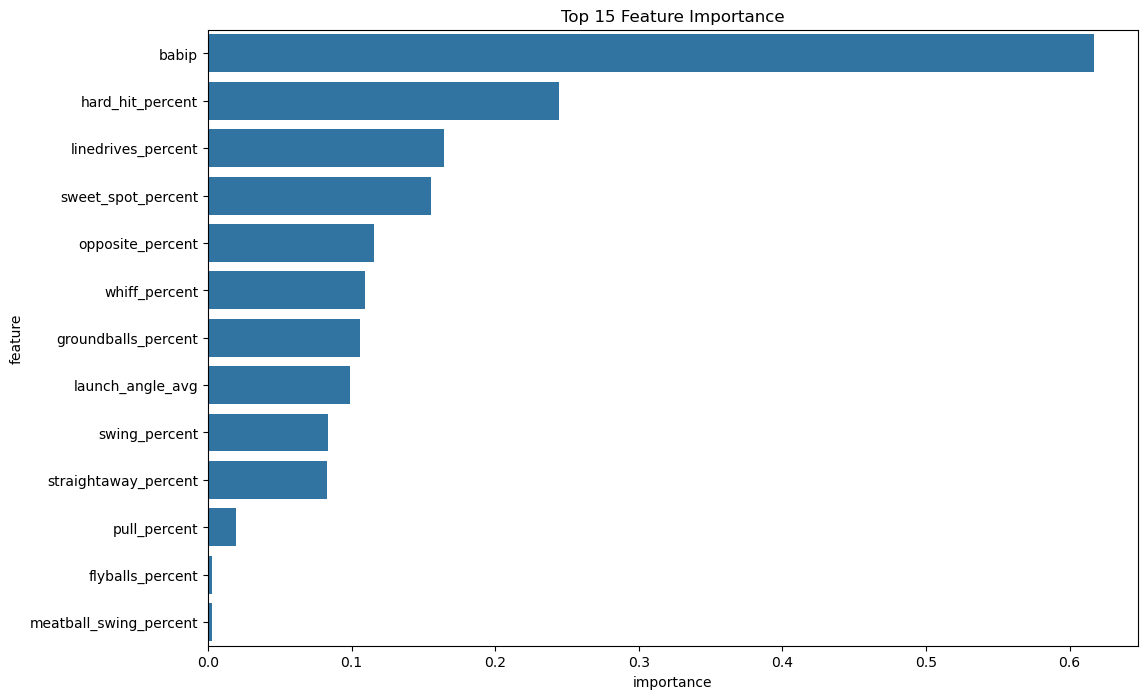

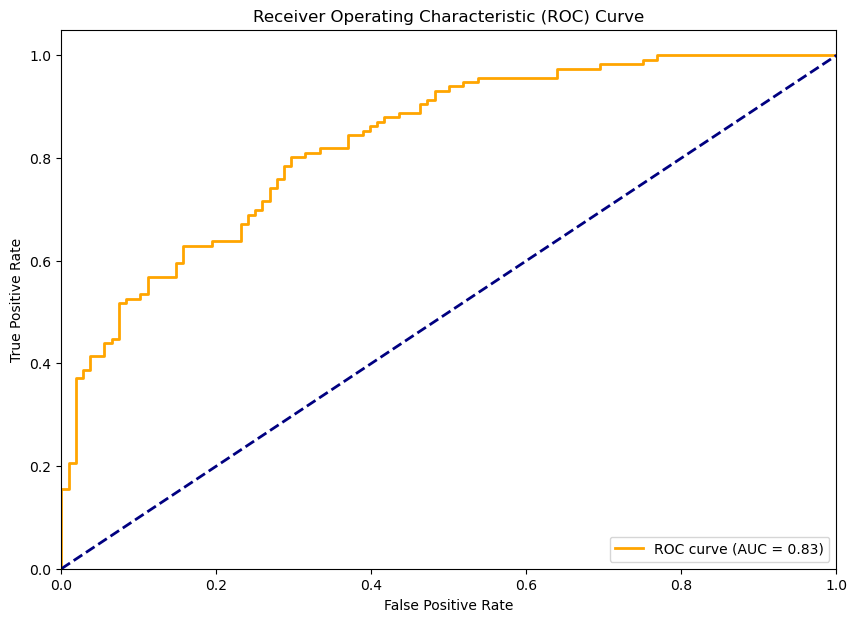

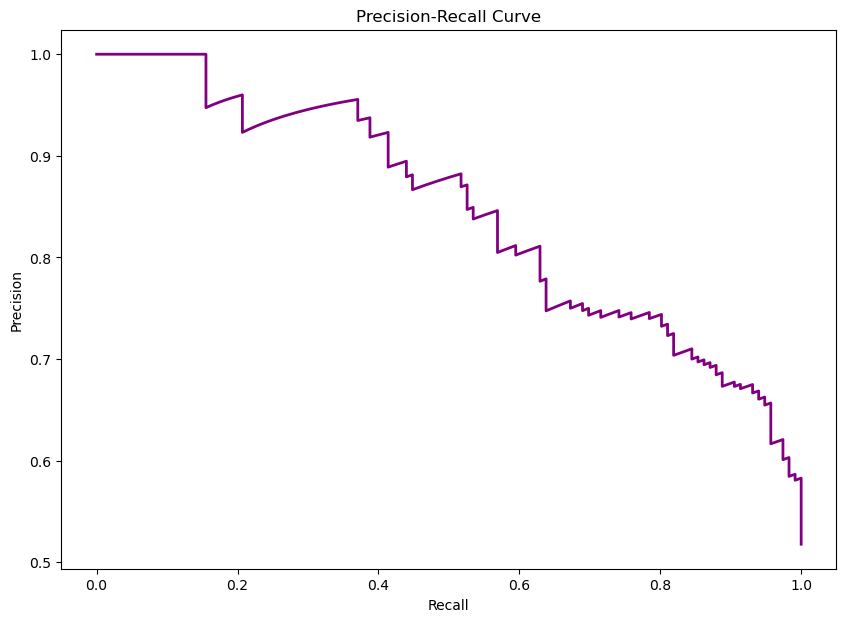

In [11]:

from sklearn.metrics import precision_recall_curve 

# 특성 중요도 시각화
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': abs(model.coef_[0])})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(x='importance', y='feature', data=feature_importance.head(15))
plt.title('Top 15 Feature Importance')
plt.show()

# ROC 곡선
from sklearn.metrics import roc_curve, auc

y_pred_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,7))
plt.plot(fpr, tpr, color='orange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 7))
plt.plot(recall, precision, color='purple', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [12]:
# Calculate the proportion of each feature's importance relative to the total importance
feature_importance['importance_ratio'] = feature_importance['importance'] / feature_importance['importance'].sum()

# Display the updated feature importance with ratios in percentage format
feature_importance['importance_ratio'] = feature_importance['importance_ratio'] * 100  # Convert to percentage

print(feature_importance.head(10))

                 feature  importance  importance_ratio
0                  babip    0.616740         34.218642
3       hard_hit_percent    0.244722         13.577949
12    linedrives_percent    0.164121          9.105932
2     sweet_spot_percent    0.155156          8.608555
9       opposite_percent    0.115789          6.424321
5          whiff_percent    0.109507          6.075786
10   groundballs_percent    0.106214          5.893074
1       launch_angle_avg    0.098783          5.480789
6          swing_percent    0.083614          4.639157
8   straightaway_percent    0.083184          4.615289


In [13]:
# 랜덤 시드 고정
np.random.seed(42)

# 시뮬레이션 함수 정의
def simulate_2025_data(data, num_samples=1118):
    simulated_data = data.select_dtypes(include=[np.number]).copy()
    simulated_result = pd.DataFrame()
    for column in simulated_data.columns:
        mean = simulated_data[column].mean()
        std = simulated_data[column].std()
        simulated_result[column] = np.random.normal(loc=mean, scale=std, size=num_samples)
    simulated_result.reset_index(drop=True, inplace=True)
    return simulated_result
    
# 시뮬레이션 반복 설정
simulations = 100  # 반복 횟수 설정
top_10_counts = {}  # 상위 10명 등장 빈도 저장 딕셔너리

for _ in range(simulations):
    # 2025년 데이터 시뮬레이션
    simulated_2025_data = simulate_2025_data(selected_data)
    
    # 스케일링
    X_2025 = simulated_2025_data[X.columns]
    X_2025_scaled = scaler.transform(X_2025)
    
    # 모델 예측
    simulated_2025_data['on_base_percent_prob'] = model.predict_proba(X_2025_scaled)[:, 1]
    
    # 상위 10명 추출
    top_10 = simulated_2025_data.nlargest(10, 'on_base_percent_prob').index
    
    # 상위 10명 등장 빈도 계산
    for player in top_10:
        top_10_counts[player] = top_10_counts.get(player, 0) + 1

# 등장 빈도 정렬
top_10_consistent = sorted(top_10_counts.items(), key=lambda x: x[1], reverse=True)[:10]

# 능력치 요소와 함께 출력
print("Top 10 Players Consistently Predicted Across Simulations with Attributes:")

# 능력치 데이터프레임 생성
top_10_player_ids = [player[0] for player in top_10_consistent]
top_10_attributes = simulated_2025_data.loc[top_10_player_ids]

# 등장 빈도를 추가
top_10_attributes['Frequency'] = [player[1] for player in top_10_consistent]

# 출력
print(top_10_attributes)

# 필요하면 상위 10명을 데이터프레임으로 정렬된 형태로 확인
top_10_attributes_sorted = top_10_attributes.sort_values(by='Frequency', ascending=False)
print("\nTop 10 Players Sorted by Frequency:")
print(top_10_attributes_sorted)

C:\Users\a\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\a\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\a\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\a\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\a\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\a\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid featu

Top 10 Players Consistently Predicted Across Simulations with Attributes:
      slg_percent     babip  launch_angle_avg  sweet_spot_percent  \
810      0.459622  0.330985         13.895879           33.403679   
674      0.397710  0.294366         16.239515           33.716156   
913      0.479390  0.356478          8.958213           36.184676   
604      0.403233  0.247645         11.319438           31.884950   
409      0.354873  0.321210          4.723734           32.037064   
1106     0.501804  0.289524          9.500279           36.156318   
207      0.388685  0.342567          5.664032           32.967408   
389      0.432875  0.334419         16.413823           37.412909   
599      0.438062  0.319333         18.080339           31.569939   
651      0.397509  0.307311         18.546498           35.348129   

      hard_hit_percent  meatball_swing_percent  whiff_percent  swing_percent  \
810          35.888697               73.331794      23.602958      41.112091   
674   

C:\Users\a\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\a\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [14]:
# 결과를 데이터프레임으로 변환
top_10_df = pd.DataFrame(top_10_consistent, columns=['row_n', 'Frequency'])

# 'row_n' 열이 없는 경우 인덱스를 기반으로 생성
if 'row_n' not in player_data.columns:
    player_data['row_n'] = player_data.index

# row_n을 기반으로 선수 이름('last_name, first_name') 매핑
top_10_df['Player Name'] = top_10_df['row_n'].astype(int).apply(lambda x: player_data.loc[x, 'last_name, first_name'])
top_10_df = top_10_df.drop(columns=['row_n'], errors='ignore')

# 상위 10명 선수 빈도 수 정렬
top_10_df = top_10_df.sort_values(by='Frequency', ascending=False)

C:\Users\a\AppData\Local\Temp\ipykernel_29776\533424078.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_data['row_n'] = player_data.index


C:\Users\a\AppData\Local\Temp\ipykernel_29776\586888283.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_df, x='Player Name', y='Frequency', palette='coolwarm')


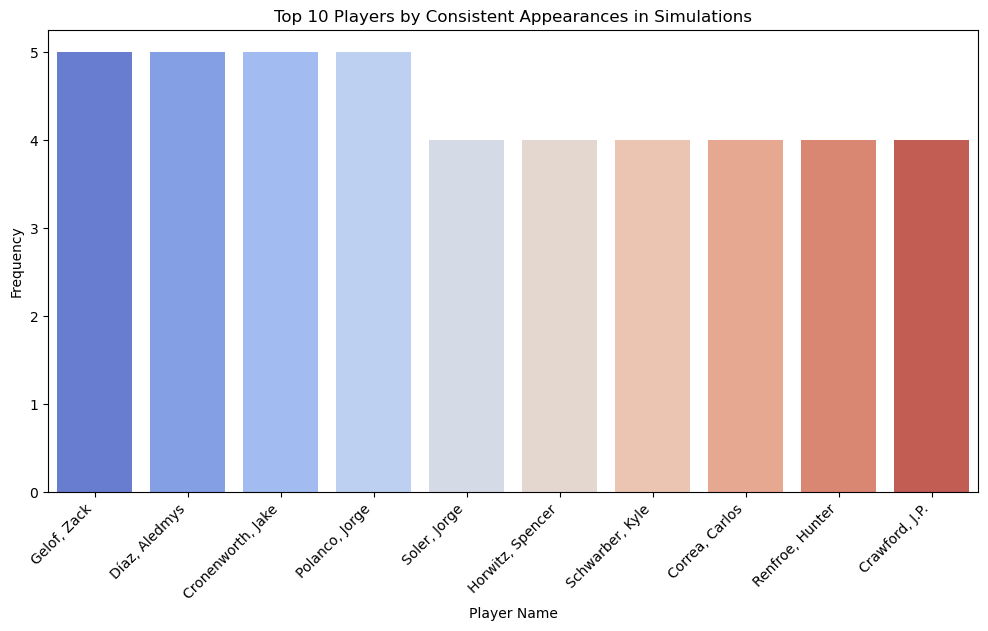

Top 10 Players with Consistent Appearances:
   Frequency        Player Name
0          5        Gelof, Zack
1          5      Díaz, Aledmys
2          5  Cronenworth, Jake
3          5     Polanco, Jorge
4          4       Soler, Jorge
5          4   Horwitz, Spencer
6          4    Schwarber, Kyle
7          4     Correa, Carlos
8          4    Renfroe, Hunter
9          4     Crawford, J.P.


In [15]:
# 막대 그래프 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_df, x='Player Name', y='Frequency', palette='coolwarm')
plt.title('Top 10 Players by Consistent Appearances in Simulations')
plt.xlabel('Player Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

# 결과 출력
print("Top 10 Players with Consistent Appearances:")
print(top_10_df)

In [16]:
# 연도별 데이터 분리
data_by_year = {year: player_data[player_data['year'] == year] for year in range(2021, 2025)}

# 각 연도 데이터의 크기 확인
for year, data in data_by_year.items():
    print(f"Year {year}: {data.shape[0]} players")

Year 2021: 262 players
Year 2022: 277 players
Year 2023: 293 players
Year 2024: 286 players


In [17]:
# 선수별 평균 SLG 데이터 생성 (2021~2024년) 
player_performance = player_data.groupby(['last_name, first_name', 'year'])['slg_percent'].mean().unstack()

# SLG 2년 연속 하락 확인 함수
def has_two_years_decreasing_trend(slg_trend):
    return any(slg_trend[i] > slg_trend[i+1] > slg_trend[i+2] for i in range(len(slg_trend) - 2))

# Top 10 선수 필터링
filtered_top_10 = []

for _, row in top_10_df.iterrows():
    player_name = row['Player Name']  # 선수 이름
    if player_name in player_performance.index:  # 성과 데이터에 선수 이름이 있는지 확인
        # 선수의 연도별 SLG 데이터 추출
        slg_trend = player_performance.loc[player_name]
        
        # 2023년, 2024년에 모두 데이터가 없는 선수 제외
        if pd.isna(slg_trend.get(2023)) and pd.isna(slg_trend.get(2024)):
            continue
        
        # 2년 연속 하락하는 선수 제외
        slg_trend_values = slg_trend.dropna().values  # 결측치 제거
        if has_two_years_decreasing_trend(slg_trend_values):
            continue
        
        # 조건을 만족하는 선수 추가
        filtered_top_10.append(player_name)

# 결과 출력
print("Filtered Top 10 Players After Excluding Those with Decreasing Trends or Missing Data:")
print(filtered_top_10)

Filtered Top 10 Players After Excluding Those with Decreasing Trends or Missing Data:
['Gelof, Zack', 'Polanco, Jorge', 'Soler, Jorge', 'Horwitz, Spencer', 'Crawford, J.P.']


C:\Users\a\AppData\Local\Temp\ipykernel_29776\2879750745.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=filtered_df, x='Player Name', y='Frequency', palette='coolwarm')


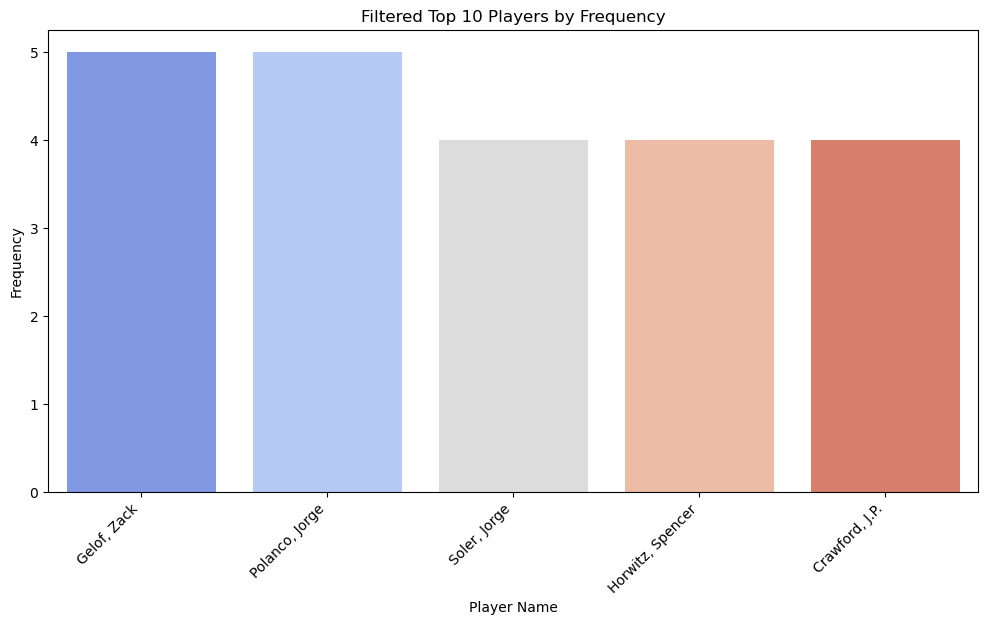

In [18]:
# Filter top_10_df to include only the filtered players
filtered_df = top_10_df[top_10_df['Player Name'].isin(filtered_top_10)].copy()

# Sort by Frequency for better visualization
filtered_df = filtered_df.sort_values(by='Frequency', ascending=False)

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(data=filtered_df, x='Player Name', y='Frequency', palette='coolwarm')
plt.title('Filtered Top 10 Players by Frequency')
plt.xlabel('Player Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()